## Alternativ datamodellering - del 2

Vi fortsetter der vi slapp, med en samling av indekserbare arrays per variabel

![image](images/sounding_variables.JPG)



In [3]:
import sys
sys.path.append("Z:\\Produktomrader\\Nautilus\\utvikling\\ntnu\\dof-2019-nh03-b07\\RAW\\code")
import numpy as np
import xarray as xr
#import kmall_ext as kmall
from read_yaml import read_kmall_header, kmall_xarray, to_latlon, to_utm

from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

kmall_catalog = "Z:\\Produktomrader\\Nautilus\\utvikling\\ntnu\\dof-2019-nh03-b07\\RAW\EM304\\conf"
conf_file = "0000_20191008_081150.kmall_conf"
zarr_catalog = "Z:\\Produktomrader\\Nautilus\\utvikling\\ntnu\\dof-2019-nh03-b07\\RAW\\zarr\\0000_20191008_081150.zarr"

def read_kmall_dt(yaml_file):
    """
    Reads the kmall datatype specification in the yaml file
    """
    fp = open(kmall_catalog+'\\'+yaml_file)
    return load(fp, Loader)

kmall_defs = read_kmall_dt(conf_file)

dv = kmall_xarray(kmall_defs)

kmall variable beamAngleReRx_deg xarray variable: angle
read_kmallvar - filename : Z:\Produktomrader\Nautilus\utvikling\ntnu\dof-2019-nh03-b07\RAW\EM304\0000_20191008_081150.kmall
                var_name : beamAngleReRx_deg
                    dims : (269, 800)
kmall variable deltaLatitude_deg xarray variable: delta_lat_deg
read_kmallvar - filename : Z:\Produktomrader\Nautilus\utvikling\ntnu\dof-2019-nh03-b07\RAW\EM304\0000_20191008_081150.kmall
                var_name : deltaLatitude_deg
                    dims : (269, 800)
kmall variable deltaLongitude_deg xarray variable: delta_lon_deg
read_kmallvar - filename : Z:\Produktomrader\Nautilus\utvikling\ntnu\dof-2019-nh03-b07\RAW\EM304\0000_20191008_081150.kmall
                var_name : deltaLongitude_deg
                    dims : (269, 800)
kmall variable detectionUncertaintyHor_m xarray variable: tuh
read_kmallvar - filename : Z:\Produktomrader\Nautilus\utvikling\ntnu\dof-2019-nh03-b07\RAW\EM304\0000_20191008_081150.kmall
       

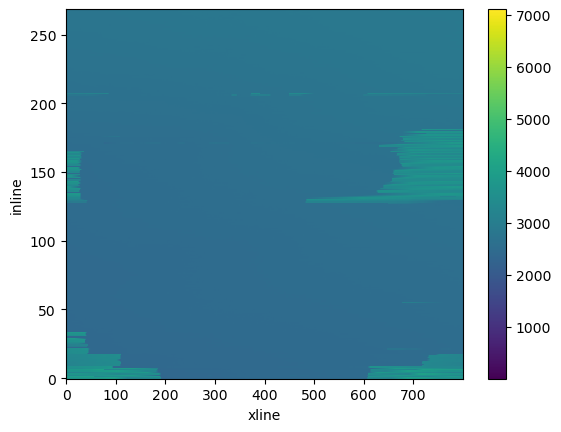

In [4]:
# Bare for å sjekke at alt er som det skal
dv['z'].plot()

In [5]:
# Hvis vi skal ha ut f.eks et dybdepunkt på et visst sted må vi gjøre samme indeksering tre steder:
xyz = (dv['x'][10,10],dv['y'][10,10],dv['z'][10,10])
xyz

(<xarray.DataArray ()>
 array(57.5407753)
 Coordinates:
     inline   int32 10
     xline    int32 10
 Attributes:
     filename:       Z:\Produktomrader\Nautilus\utvikling\ntnu\dof-2019-nh03-b...
     datagram_type:  MRZ,
 <xarray.DataArray ()>
 array(-1806.32214355)
 Coordinates:
     inline   int32 10
     xline    int32 10
 Attributes:
     filename:       Z:\Produktomrader\Nautilus\utvikling\ntnu\dof-2019-nh03-b...
     datagram_type:  MRZ,
 <xarray.DataArray ()>
 array(3196.10498047)
 Coordinates:
     inline   int32 10
     xline    int32 10
 Attributes:
     filename:       Z:\Produktomrader\Nautilus\utvikling\ntnu\dof-2019-nh03-b...
     datagram_type:  MRZ)

In [6]:
xyz = (dv['x'][10,10].to_numpy(),dv['y'][10,10].to_numpy(),dv['z'][10,10].to_numpy())
xyz

(array(57.5407753), array(-1806.32214355), array(3196.10498047))

In [7]:
xy_adder = dv['x']+dv['y']
xy_adder

<xarray.DataArray (inline: 269, xline: 800)>
array([[-2.89435318e+03, -2.88718157e+03, -2.87923817e+03, ...,
         2.79180322e+03,  2.79864907e+03,  2.80545991e+03],
       [-3.05950434e+03, -3.05185928e+03, -3.04301508e+03, ...,
         2.91531363e+03,  2.93818059e+03,  2.96113146e+03],
       [-2.58359802e+03, -2.57694175e+03, -2.57029918e+03, ...,
         2.53836709e+03,  2.54548759e+03,  2.55184760e+03],
       ...,
       [ 1.09081554e+01,  1.33130291e+01, -1.09971161e+03, ...,
         1.16901583e+03,  1.17223363e+03,  1.17506287e+03],
       [-3.14544582e+00, -5.76016903e-01, -1.11099048e+03, ...,
         1.15247723e+03,  1.15552471e+03,  1.15851067e+03],
       [-1.27353206e+01, -9.94313529e+00, -1.12712987e+03, ...,
         1.14869471e+03,  1.15140389e+03,  1.15416704e+03]])
Coordinates:
  * inline   (inline) int32 0 1 2 3 4 5 6 7 ... 261 262 263 264 265 266 267 268
  * xline    (xline) int32 0 1 2 3 4 5 6 7 8 ... 792 793 794 795 796 797 798 799

### Dataset

A multi-dimensional, in memory, array database.

A dataset resembles an in-memory representation of a NetCDF file, and consists of variables, coordinates and attributes which together form a self describing dataset

https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html#xarray.Dataset

In [8]:
# Creating a xarray dataset with aligned dimensions and coordinates
ds = xr.Dataset(dv)
ds

<xarray.Dataset>
Dimensions:            (inline: 269, xline: 800, time: 224920)
Coordinates:
  * inline             (inline) int32 0 1 2 3 4 5 6 ... 263 264 265 266 267 268
  * xline              (xline) int32 0 1 2 3 4 5 6 ... 794 795 796 797 798 799
  * time               (time) int32 0 1 2 3 4 ... 224916 224917 224918 224919
Data variables: (12/24)
    angle              (inline, xline) float64 36.35 36.28 ... -22.66 -22.71
    delta_lat_deg      (inline, xline) float64 -0.0226 -0.02254 ... 0.008733
    delta_lon_deg      (inline, xline) float64 -0.04646 -0.04635 ... 0.01811
    tuh                (inline, xline) float64 5.22 2.578 ... 0.6869 0.6884
    tuv                (inline, xline) float64 6.671 3.302 1.649 ... 1.707 1.707
    qF                 (inline, xline) float64 0.1768 0.0875 ... 0.05969 0.05967
    ...                 ...
    ellipsoidHeight_m  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    heading            (time) float64 300.9 300.9 300.9 ... 301.9 301.9 301.9
    nav_lat            (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nav_lon            (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pitch              (time) float64 -2.38 -2.44 -2.49 -2.54 ... 0.63 0.62 0.61
    roll_deg           (time) float64 0.18 0.2 0.22 0.24 ... 0.61 0.59 0.57 0.55

In [9]:
# And then you can use the common dimensions and coordinates...
ds.sel(inline=10,xline=10)

<xarray.Dataset>
Dimensions:            (time: 224920)
Coordinates:
    inline             int32 10
    xline              int32 10
  * time               (time) int32 0 1 2 3 4 ... 224916 224917 224918 224919
Data variables: (12/24)
    angle              float64 29.29
    delta_lat_deg      float64 -0.014
    delta_lon_deg      float64 -0.02689
    tuh                float64 4.022
    tuv                float64 7.1
    qF                 float64 0.2226
    ...                 ...
    ellipsoidHeight_m  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    heading            (time) float64 300.9 300.9 300.9 ... 301.9 301.9 301.9
    nav_lat            (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nav_lon            (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pitch              (time) float64 -2.38 -2.44 -2.49 -2.54 ... 0.63 0.62 0.61
    roll_deg           (time) float64 0.18 0.2 0.22 0.24 ... 0.61 0.59 0.57 0.55

In [10]:
# Kan velge en dimensjon for å se på de andre
ds.sel(inline=20)

<xarray.Dataset>
Dimensions:            (xline: 800, time: 224920)
Coordinates:
    inline             int32 20
  * xline              (xline) int32 0 1 2 3 4 5 6 ... 794 795 796 797 798 799
  * time               (time) int32 0 1 2 3 4 ... 224916 224917 224918 224919
Data variables: (12/24)
    angle              (xline) float64 -0.02085 -0.08781 25.04 ... -25.04 -25.12
    delta_lat_deg      (xline) float64 -0.000156 -0.0001252 ... 0.009132
    delta_lon_deg      (xline) float64 0.000659 0.0007217 ... 0.0168 0.01638
    tuh                (xline) float64 1.229e-05 4.732e-06 ... 0.8224 0.7506
    tuv                (xline) float64 0.01457 0.01453 2.004 ... 1.47 1.769 1.61
    qF                 (xline) float64 0.0004237 0.0004226 ... 0.07075 0.06445
    ...                 ...
    ellipsoidHeight_m  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    heading            (time) float64 300.9 300.9 300.9 ... 301.9 301.9 301.9
    nav_lat            (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nav_lon            (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pitch              (time) float64 -2.38 -2.44 -2.49 -2.54 ... 0.63 0.62 0.61
    roll_deg           (time) float64 0.18 0.2 0.22 0.24 ... 0.61 0.59 0.57 0.55

In [11]:
# Kan velge en dimensjon for å se på de andre
ds.sel(xline=20)

<xarray.Dataset>
Dimensions:            (inline: 240, time: 8762)
Coordinates:
  * inline             (inline) int32 0 1 2 3 4 5 6 ... 234 235 236 237 238 239
    xline              int32 20
  * time               (time) int32 0 1 2 3 4 5 ... 8757 8758 8759 8760 8761
Data variables: (12/23)
    angle              (inline) float64 64.18 64.18 64.41 ... 64.47 63.73 63.73
    delta_lat_deg      (inline) float64 0.001254 0.001244 ... 0.00125 0.00125
    delta_lon_deg      (inline) float64 0.001011 0.001012 ... 0.001006 0.001015
    tuh                (inline) float64 0.3828 0.2647 0.1724 ... 0.3818 0.2661
    tuv                (inline) float64 0.1546 0.1069 0.06966 ... 0.1542 0.1075
    qF                 (inline) float64 0.2396 0.1667 0.1096 ... 0.2396 0.1667
    ...                 ...
    ellipsoidHeight_m  (time) float64 138.6 138.6 138.6 ... 138.6 138.6 138.6
    heading            (time) float64 121.3 121.3 121.3 ... 129.9 130.0 130.1
    nav_lat            (time) float64 45.47 45.47 45.47 ... 45.46 45.46 45.46
    nav_lon            (time) float64 -83.61 -83.61 -83.61 ... -83.61 -83.61
    pitch              (time) float64 1.736 1.813 1.889 ... 1.394 1.37 1.349
    roll_deg           (time) float64 3.258 3.247 3.236 ... 3.15 3.136 3.12

In [12]:
# Lazy evaluation, use to_numpy method
selection = ds.sel(xline=20)
selection

<xarray.Dataset>
Dimensions:            (inline: 240, time: 8762)
Coordinates:
  * inline             (inline) int32 0 1 2 3 4 5 6 ... 234 235 236 237 238 239
    xline              int32 20
  * time               (time) int32 0 1 2 3 4 5 ... 8757 8758 8759 8760 8761
Data variables: (12/23)
    angle              (inline) float64 64.18 64.18 64.41 ... 64.47 63.73 63.73
    delta_lat_deg      (inline) float64 0.001254 0.001244 ... 0.00125 0.00125
    delta_lon_deg      (inline) float64 0.001011 0.001012 ... 0.001006 0.001015
    tuh                (inline) float64 0.3828 0.2647 0.1724 ... 0.3818 0.2661
    tuv                (inline) float64 0.1546 0.1069 0.06966 ... 0.1542 0.1075
    qF                 (inline) float64 0.2396 0.1667 0.1096 ... 0.2396 0.1667
    ...                 ...
    ellipsoidHeight_m  (time) float64 138.6 138.6 138.6 ... 138.6 138.6 138.6
    heading            (time) float64 121.3 121.3 121.3 ... 129.9 130.0 130.1
    nav_lat            (time) float64 45.47 45.47 45.47 ... 45.46 45.46 45.46
    nav_lon            (time) float64 -83.61 -83.61 -83.61 ... -83.61 -83.61
    pitch              (time) float64 1.736 1.813 1.889 ... 1.394 1.37 1.349
    roll_deg           (time) float64 3.258 3.247 3.236 ... 3.15 3.136 3.12

In [13]:
selection = ds['z'].sel(xline=20)
selection

<xarray.DataArray 'z' (inline: 240)>
array([64.79171753, 64.4553299 , 64.78533173, 64.47480774, 64.60597229,
       64.61094666, 64.65885162, 64.83846283, 64.63796997, 64.55029297,
       64.29327393, 64.28820038, 64.54069519, 64.60328674, 64.47444153,
       64.49242401, 64.6346283 , 64.60997772, 64.90638733, 64.84581757,
       64.29904175, 64.40164948, 64.78905487, 64.5058136 , 64.21406555,
       64.21291351, 64.73293304, 64.54915619, 64.33383179, 64.38301086,
       64.66246033, 64.77193451, 64.46846008, 64.5905304 , 64.66490173,
       64.67314148, 64.83306885, 64.7149353 , 64.80124664, 64.87438965,
       64.76984406, 64.92209625, 64.64731598, 64.81612396, 64.86904907,
       64.9252243 , 64.7071228 , 64.69181824, 64.73890686, 64.94042206,
       65.09832764, 64.54059601, 64.84976959, 64.65894318, 64.8427887 ,
       64.82115173, 64.88660431, 64.75868225, 64.40378571, 64.04324341,
       64.98265076, 64.47285461, 64.63702393, 64.90843201, 64.9826889 ,
       65.03934479, 64.95675659, 64.92205048, 65.11083221, 64.95610809,
       64.61270905, 64.71496582, 64.4551239 , 64.59290314, 65.21547699,
       65.34645844, 65.00415802, 64.77745056, 64.56090546, 64.58024597,
       65.07078552, 64.84701538, 64.36093903, 64.50711823, 65.07499695,
       64.96473694, 64.65290833, 64.9548645 , 64.75469971, 64.93300629,
       64.67800903, 64.8690033 , 64.74072266, 64.77165222, 64.96800995,
       64.87495422, 64.91629791, 64.77668762, 65.36244202, 65.20793152,
...
       65.61532593, 65.56047821, 65.44868469, 65.5830307 , 65.53968048,
       65.47302246, 65.41831207, 65.39133453, 65.47795868, 65.62084198,
       65.49543762, 65.128685  , 65.39343262, 65.11022949, 65.06817627,
       65.19438934, 64.66861725, 64.90603638, 65.30941772, 65.04420471,
       65.23987579, 64.93312073, 65.16997528, 65.11798859, 65.12728882,
       65.03160858, 65.23578644, 65.22937012, 65.30236053, 64.99032593,
       65.55458069, 65.17533112, 65.17573547, 65.21827698, 65.21728516,
       65.24100494, 65.08920288, 65.25857544, 64.92181396, 65.2400589 ,
       65.14617157, 64.7299118 , 64.90596771, 64.80961609, 64.88464355,
       65.04273987, 65.11282349, 64.85881042, 65.04779053, 64.73000336,
       65.08074188, 65.04084015, 64.56032562, 64.68923187, 65.29535675,
       64.92957306, 65.20952606, 65.18990326, 64.66882324, 64.93955994,
       65.00021362, 64.67889404, 64.61677551, 64.37653351, 64.95838928,
       65.17396545, 64.84214783, 64.67977905, 64.89495087, 65.14388275,
       64.88694763, 64.66429901, 64.94628906, 64.9226532 , 64.65563965,
       64.36480713, 64.58748627, 64.88355255, 65.01194   , 64.80665588,
       64.75569916, 64.49343872, 65.08081055, 64.66057587, 64.14890289,
       64.16738892, 65.03572845, 64.88752747, 64.69733429, 64.62112427,
       64.92804718, 64.86232758, 64.56237793, 64.63499451, 65.05336761,
       65.01799011, 64.59243774, 64.80316162, 64.9924469 , 65.14865112])
Coordinates:
  * inline   (inline) int32 0 1 2 3 4 5 6 7 ... 232 233 234 235 236 237 238 239
    xline    int32 20
Attributes:
    filename:       C:\local\data\kmall_data\0007_20190513_154724_ASVBEN.kmall
    datagram_type:  MRZ

In [14]:
ds = to_latlon(ds)

In [15]:
ds.plot.scatter(x='xl',y='yl',hue='zm')

In [16]:
ds = to_utm(ds)

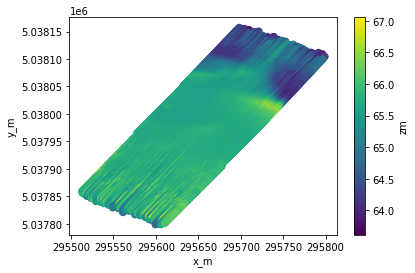

In [17]:
ds.plot.scatter(x='x_m',y='y_m',hue='zm')

In [18]:
from read_yaml import smooth_it

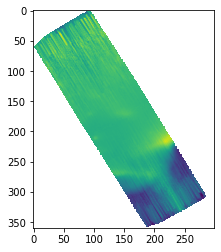

In [19]:
img = smooth_it(ds)

In [20]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.contour(img)

In [21]:
plt.contourf(img)

In [22]:
ds.info()

xarray.Dataset {
dimensions:
	inline = 240 ;
	xline = 400 ;
	time = 8762 ;

variables:
	int32 inline(inline) ;
	int32 xline(xline) ;
	float64 angle(inline, xline) ;
		angle:filename = C:\local\data\kmall_data\0007_20190513_154724_ASVBEN.kmall ;
		angle:datagram_type = MRZ ;
	float64 delta_lat_deg(inline, xline) ;
		delta_lat_deg:filename = C:\local\data\kmall_data\0007_20190513_154724_ASVBEN.kmall ;
		delta_lat_deg:datagram_type = MRZ ;
	float64 delta_lon_deg(inline, xline) ;
		delta_lon_deg:filename = C:\local\data\kmall_data\0007_20190513_154724_ASVBEN.kmall ;
		delta_lon_deg:datagram_type = MRZ ;
	float64 tuh(inline, xline) ;
		tuh:filename = C:\local\data\kmall_data\0007_20190513_154724_ASVBEN.kmall ;
		tuh:datagram_type = MRZ ;
	float64 tuv(inline, xline) ;
		tuv:filename = C:\local\data\kmall_data\0007_20190513_154724_ASVBEN.kmall ;
		tuv:datagram_type = MRZ ;
	float64 qF(inline, xline) ;
		qF:filename = C:\local\data\kmall_data\0007_20190513_154724_ASVBEN.kmall ;
		qF:datagram_t

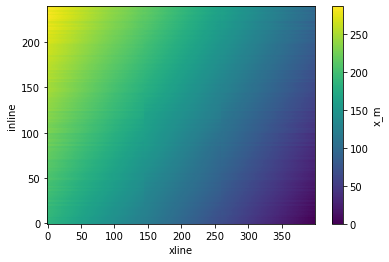

In [23]:
ds['x_m'].plot()

In [24]:
ds['x_m'].sel(inline=130).plot()

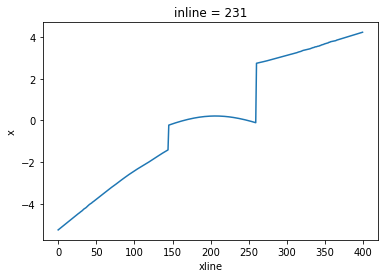

In [25]:
ds['x'].sel(inline=231).plot()

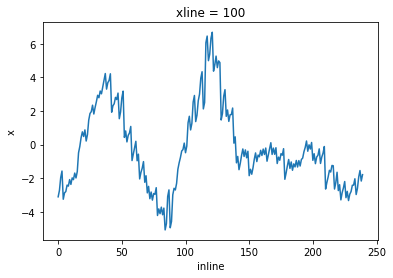

In [26]:
ds['x'].sel(xline=100).plot()

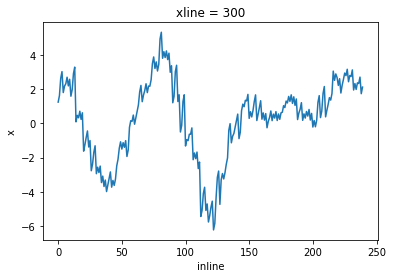

In [27]:
ds['x'].sel(xline=300).plot()

In [28]:
ds.to_zarr(zarr_catalog)

ContainsGroupError: path '' contains a group